<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2
import timeit

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [2]:
train_dir = 'dogs-vs-cats/train'
test_dir = 'dogs-vs-cats/test1'

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [3]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    #################
    label = img[0:3]
    if label == 'cat':
        return np.array([1,0])
    return np.array([0,1])
    #################

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [4]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data():
    ###create a list###
    train_data = []
    ####for loop to fetch img from directory (hint:use tqdm)###
    for file in tqdm(os.listdir(train_dir)):    
        ###get label of img###
        label = label_img(file)
        ###use cv2 to read the img and resize the it to (227 x 227)###
        img = cv2.imread(os.path.join(train_dir, file))
        img = cv2.resize(img, (227,227))
        ###append the img and label to the list###
        train_data.append([img,label])
        
    ###shuffle training data###
    shuffle(train_data)
    ###return training data###
    return train_data

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [5]:
def create_test_data():
     ###create a list###
    test_data = []
    ####for loop to fetch img from directory (hint:use tqdm)###
    for file in tqdm(os.listdir(test_dir)):    
        ###use cv2 to read the img and resize the it to (227 x 227)###
        img = cv2.imread(os.path.join(test_dir, file))
        img = cv2.resize(img, (227,227))
        ###append the img and label to the list###
        test_data.append(img)
    ###shuffle training data###
    shuffle(test_data)
    ###return training data###
    return test_data

<p style="font-size:20px">Step 4: create your train and test data</p>

In [6]:
train_data = create_train_data()
test_data = create_test_data()

100%|██████████| 12500/12500 [00:58<00:00, 213.78it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

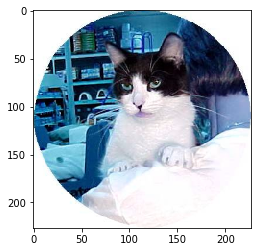

In [7]:
plt.imshow(train_data[0][0])

<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [8]:
train_data[0][0].shape

(227, 227, 3)

In [9]:
for i in range(len(train_data)):
     train_data[i][0] = train_data[i][0].reshape((1,227,227,3))
for i in range(len(test_data)):
     test_data[i] = test_data[i].reshape((1,227,227,3))
val_data = train_data[:500]
train_data = train_data[500:]

<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [11]:
dir = 'dog_cat'
for i in range(1,6):
    with open(dir+'/train'+str(i), 'wb') as f:
        if i==5: 
            pickle.dump(train_data[5000*(i-1):], f)
        else:
            pickle.dump(train_data[5000*(i-1):5000*i], f)
        
for i in range(1,4):
    with open(dir+'/test'+str(i), 'wb') as f:
        if i==3: 
            pickle.dump(test_data[5000*(i-1):], f)
        else:
            pickle.dump(test_data[5000*(i-1):5000*i], f)        
        
with open(dir+'/validation', 'wb') as f:
    pickle.dump(val_data, f)